# Titanic Dataset Analysis

In this notebook, the Titanic Dataset will be analyzed that includes information about the passengers of the Titanic and who survived at the end. You will start by getting to know the dataset and at the end build a supervised model to predict who will survive.

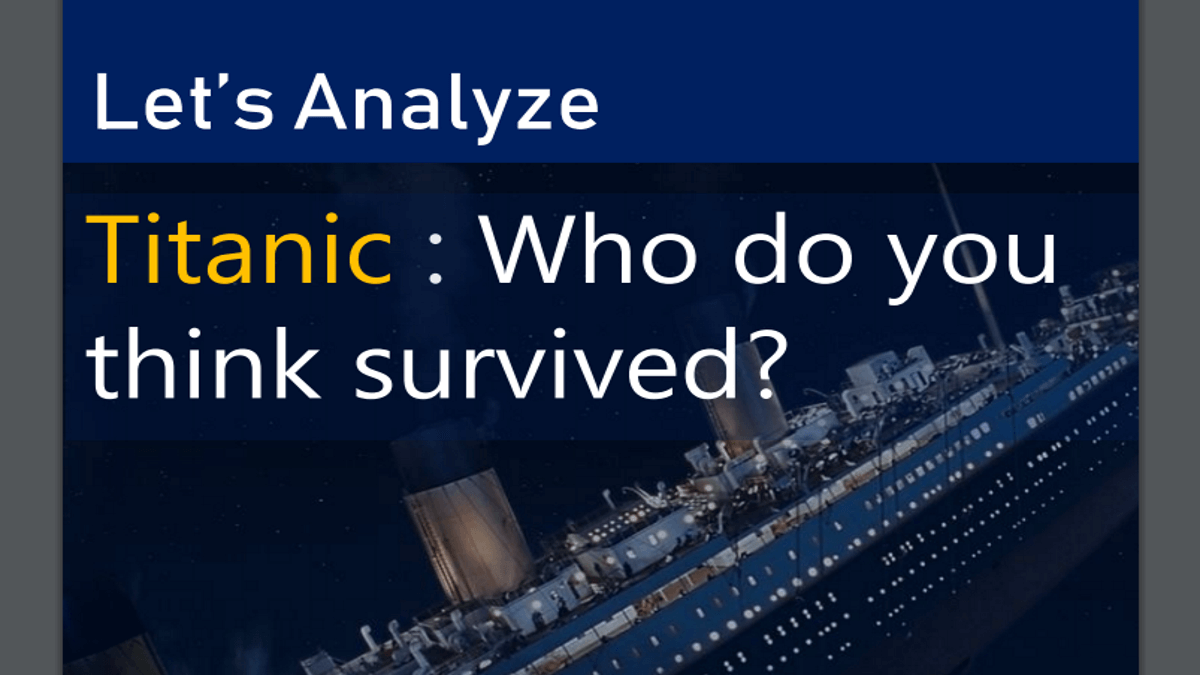

### Load the titanic dataset (download the files from Wiki)

Check the number of features and rows after loading.

In [148]:
# YOUR CODE HERE
import pandas as pd

data = pd.read_csv("~/Downloads/Titanic_all.csv")
print(data.head(10))
len(data.columns)
data.shape[0]

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

     age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0  29.00      0      0     24160  211.3375 

1309

### Data columns description

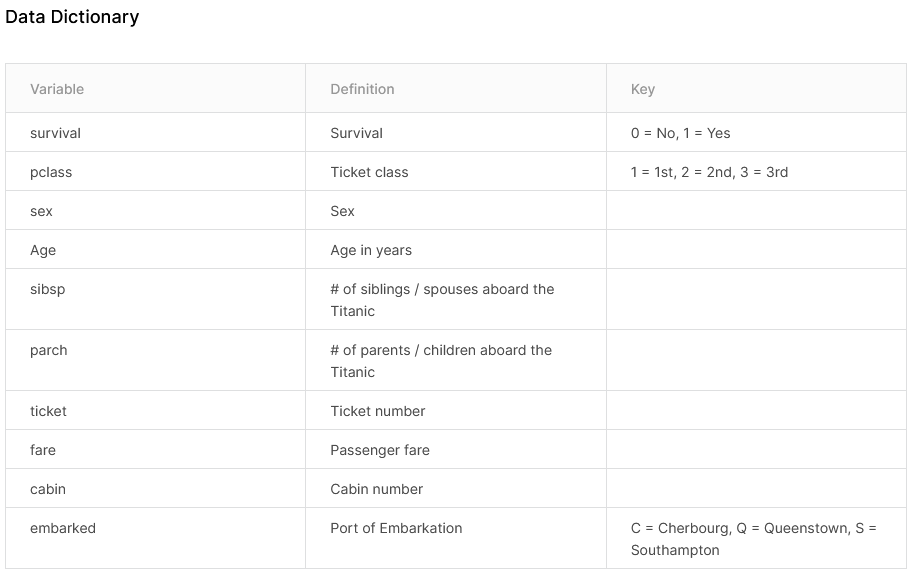

### Find out how many passengers have embarked in Southampton.

In [149]:
embarked_s = data.loc[data['embarked'].eq("S")]
embarked_s.shape[0]

914

### Who has paid most for his/her ticket? Find out the name of this passenger.

In [150]:
payed_most = data.loc[data["fare"].eq(data['fare'].max())]
payed_most["name"]


49                    Cardeza, Mr. Thomas Drake Martinez
50     Cardeza, Mrs. James Warburton Martinez (Charlo...
183                               Lesurer, Mr. Gustave J
302                                     Ward, Miss. Anna
Name: name, dtype: object

### Who was the youngest passenger? Find out his/her name and age.

In [151]:
youngest_passenger = data.loc[data["age"].eq(data["age"].min())]
youngest_passenger["name"], youngest_passenger["age"]

(763    Dean, Miss. Elizabeth Gladys "Millvina"
 Name: name, dtype: object,
 763    0.17
 Name: age, dtype: float64)

### Who was the oldest passenger who did not survive? Find out his/her name and age.

In [152]:
not_survived = data[data['survived'] == 0]
oldest_passenger = not_survived.loc[not_survived["age"].eq(not_survived["age"].max())]
oldest_passenger.name, oldest_passenger.age

(1235    Svensson, Mr. Johan
 Name: name, dtype: object,
 1235    74.0
 Name: age, dtype: float64)

## Correlations

Correlate the features and check for dependencies.

In [153]:
corrs = data.corr()
corrs


/var/folders/_g/xf5t3c5s0nvdfvrv64nby8180000gn/T/ipykernel_45494/3892602439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = data.corr()


,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


## Create visualizations for the next tasks

### Grouped bar plot showing how many passengers died/survived for each passenger class

Create a pivotable with the columns 'pclass' and 'survival' and plot a bar chart.

pclass  survived
1       0           123
        1           200
2       0           158
        1           119
3       0           528
dtype: int64
survived    0    1
pclass            
1         123  200
2         158  119
3         528  181


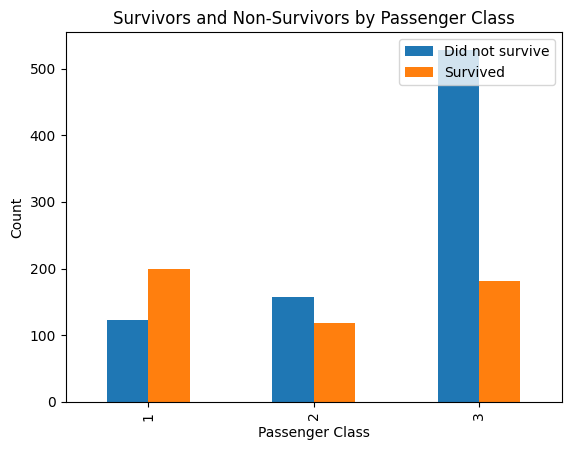

In [154]:
import matplotlib.pyplot as plt

grouped = data.groupby(['pclass', 'survived']).size().unstack()

print(data.groupby(['pclass', 'survived']).size().head())
print(grouped.head())
ax = grouped.plot(kind='bar', stacked=False)

plt.title('Survivors and Non-Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], loc='upper right')
plt.xticks(range(len(grouped.index)), grouped.index)
plt.show()

### Sankey diagram
Sankey diagrams are flow diagrams that visualize the flow from one category to another. 

Use a Sankey diagram to visualize how many passengers from each embarking location survived/did not survive.

![Example Sankey Diagram](https://plot.ly/~PythonPlotBot/2588/basic-sankey-diagram.png)

First of, prepare the data in such a way, that it can be visualized later on. For help on that, please be referred to [psankey](https://github.com/mandalsubhajit/psankey). Important to know is, that you need to define for each _stream_ a `source`, `target` and `value`. The `source` is the embarking location, the `target` if survived or not and the `value` the number of people who died or survived.

In [155]:
sankey_data = data.dropna(subset=['embarked']).groupby(['embarked', 'survived']).size().reset_index()

sankey_data['target'] = sankey_data['survived'].apply(lambda x: 'Survived' if x == 1 else 'Died')
sankey_data = sankey_data.rename(columns={'embarked': 'source', 0: 'value'})
sankey_data = sankey_data[['source', 'target', 'value']]

After separating those numbers and preprocessing those, use them to plot the Sankey diagram.

In [156]:
!pip install psankey

You should consider upgrading via the '/Users/izzy/.pyenv/versions/3.8.15/bin/python3.8 -m pip install --upgrade pip' command.


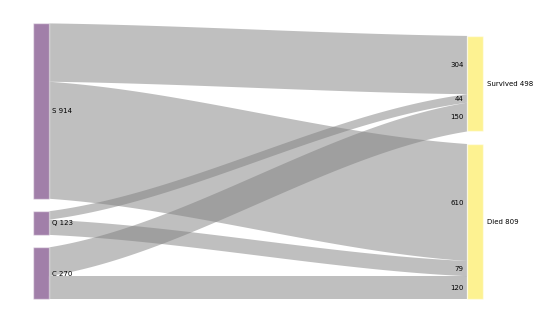

In [157]:
from psankey.sankey import sankey
import matplotlib.pyplot as plt

sankey(sankey_data)
plt.show()

## Do you have also other ideas for visualizing the features in the dataset?

In [158]:
# TODO
# categorizing age into classes and see how many died 

## Preprocessing

* Do you have to encode features in the dataset? 
* Are there any missing data? How should you treat them?

In [159]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
preprocessed = pd.DataFrame(data.copy())

encoded_sex = label_encoder.fit_transform(preprocessed['sex'])
encoded_embarked = label_encoder.fit_transform(preprocessed['embarked'])

print(encoded_sex, encoded_embarked)
preprocessed['sex'] = encoded_sex
preprocessed['embarked'] = encoded_embarked

print(data['embarked'].unique())

print(data['sex'].head())

preprocessed = preprocessed.drop(columns=['ticket', 'cabin', 'home.dest', 'name', 'boat', 'body'])

average_age = data['age'].mean()
preprocessed = preprocessed.fillna(average_age)
preprocessed.dropna()

preprocessed.head()


[0 1 0 ... 1 1 1] [2 2 2 ... 0 0 2]
['S' 'C' nan 'Q']
0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.00,0,0,211.3375,2
1,1,1,1,0.92,1,2,151.5500,2
2,1,0,0,2.00,1,2,151.5500,2
3,1,0,1,30.00,1,2,151.5500,2
4,1,0,0,25.00,1,2,151.5500,2


### Feature Engineering (optional)

Engineer new features by extracting information from features or by combining them.

In [160]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

## Create a decision tree and logistic regression classifier to predict who will survive and who will die. 


In [ ]:
first = preprocessed.loc[0].drop(columns=['survived'])

X = preprocessed.drop(columns=['survived'])
Y = preprocessed['survived']

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


model = DecisionTreeClassifier()
model.fit(X,Y)
model_logreg = LogisticRegression()
model_logreg.fit(X,Y)
#pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked'
datapoint = {
  'pclass': 1,
  'sex': 0,
  'age': 29,
  'sibsp': 0,
  'parch': 0,
  'fare': 211,
  'embarked': 1
}

print(data.loc[0])
print(label_encoder.classes_)
df_dp = pd.DataFrame([datapoint])
print(model.predict(df_dp))
print(model_logreg.predict(df_dp))


pclass                                   1
survived                                 1
name         Allen, Miss. Elisabeth Walton
sex                                 female
age                                   29.0
sibsp                                    0
parch                                    0
ticket                               24160
fare                              211.3375
cabin                                   B5
embarked                                 S
boat                                     2
body                                   NaN
home.dest                     St Louis, MO
Name: 0, dtype: object
['C' 'Q' 'S' nan]


array([1])

### Train the classifiers

Do not forget to create a train and test dataset for evaluation. Also check the label distribution in the train and test dataset

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Visualize the decision tree model

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Assess the performance of the models.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Compare the output of the two models.

* Who will survive? What are the most important features for prediction?
* Which model achieves the better performance?